# 🚘 Car Pricing ML: Estimating Car Prices for a Local Dealership 🚘

### Step 1. Setup & Data Loading

In [2]:
# =========================
# 1. Setup & Data Loading
# =========================

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

import textwrap
import warnings
warnings.filterwarnings("ignore")

# For plots
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("viridis")

# ----- Load data -----

file_path = "/content/cars - cars.csv"
df = pd.read_csv(file_path)

print("Shape:", df.shape)
df.head()


Shape: (56244, 12)


,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B


### Step 2. Basic Data Overview

In [6]:
# =========================
# 2. Basic Data Overview
# =========================

print("\n=== Columns & dtypes ===")
print(df.dtypes)

print("\n=== Sample rows ===")
display(df.head(10))

print("\n=== Descriptive statistics (numeric) ===")
display(df.describe().T)

print("\n=== Missing values per column ===")
print(df.isna().sum())

print("\n=== Unique values per column (first few) ===")
for col in df.columns:
    nunique = df[col].nunique()
    print(f"\nColumn: {col} | unique: {nunique}")
    print(df[col].value_counts(dropna=False).head(10))



=== Columns & dtypes ===
make                    object
model                   object
priceUSD                 int64
year                     int64
condition               object
mileage(kilometers)    float64
fuel_type               object
volume(cm3)            float64
color                   object
transmission            object
drive_unit              object
segment                 object
dtype: object

=== Sample rows ===


,make,model,priceUSD,year,condition,mileage(kilometers),fuel_type,volume(cm3),color,transmission,drive_unit,segment
0,mazda,2,5500,2008,with mileage,162000.0,petrol,1500.0,burgundy,mechanics,front-wheel drive,B
1,mazda,2,5350,2009,with mileage,120000.0,petrol,1300.0,black,mechanics,front-wheel drive,B
2,mazda,2,7000,2009,with mileage,61000.0,petrol,1500.0,silver,auto,front-wheel drive,B
3,mazda,2,3300,2003,with mileage,265000.0,diesel,1400.0,white,mechanics,front-wheel drive,B
4,mazda,2,5200,2008,with mileage,97183.0,diesel,1400.0,gray,mechanics,front-wheel drive,B
5,mazda,2,3400,2005,with mileage,150000.0,petrol,1300.0,blue,mechanics,front-wheel drive,B
6,mazda,2,5000,2008,with mileage,112000.0,petrol,1300.0,gray,mechanics,front-wheel drive,B
7,mazda,2,7300,2009,with mileage,95000.0,petrol,1500.0,other,auto,front-wheel drive,B
8,mazda,2,6400,2010,with mileage,93804.0,petrol,1500.0,other,mechanics,front-wheel drive,B
9,mazda,2,6132,2008,with mileage,196511.0,petrol,1500.0,other,auto,front-wheel drive,B



=== Descriptive statistics (numeric) ===


,count,mean,std,min,25%,50%,75%,max
priceUSD,56244.0,7415.456440,8316.959261,48.0,2350.0,5350.0,9807.5,235235.0
year,56244.0,2003.454840,8.144247,1910.0,1998.0,2004.0,2010.0,2019.0
mileage(kilometers),56244.0,244395.631020,321030.668382,0.0,137000.0,228500.0,310000.0,9999999.0
volume(cm3),56197.0,2104.860615,959.201633,500.0,1600.0,1996.0,2300.0,20000.0



=== Missing values per column ===
make                      0
model                     0
priceUSD                  0
year                      0
condition                 0
mileage(kilometers)       0
fuel_type                 0
volume(cm3)              47
color                     0
transmission              0
drive_unit             1905
segment                5291
dtype: int64

=== Unique values per column (first few) ===

Column: make | unique: 96
make
volkswagen       6861
audi             4030
bmw              4013
opel             3779
renault          3713
mercedes-benz    3541
ford             3078
peugeot          2876
nissan           2233
toyota           2177
Name: count, dtype: int64

Column: model | unique: 1034
model
passat      2086
5-seriya    1476
a6          1276
golf        1070
astra       1013
e-klass      988
3-seriya     823
vectra       815
laguna       768
mondeo       731
Name: count, dtype: int64

Column: priceUSD | unique: 2970
priceUSD
1000    757
1500  

### Step 3. EDA: Target & Features

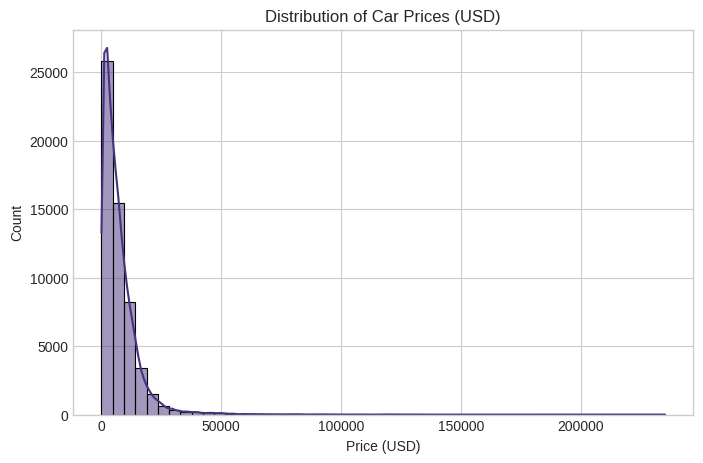

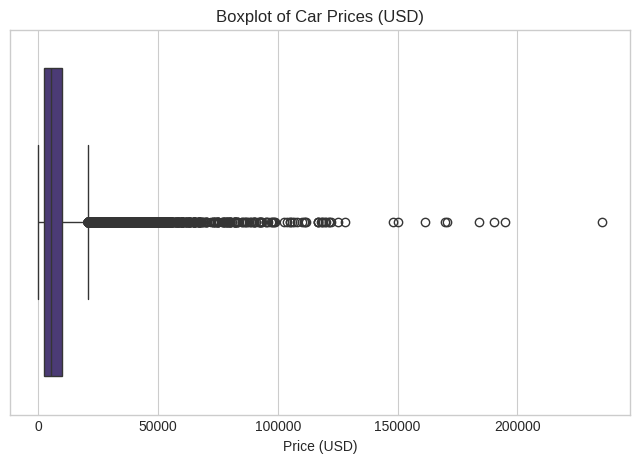

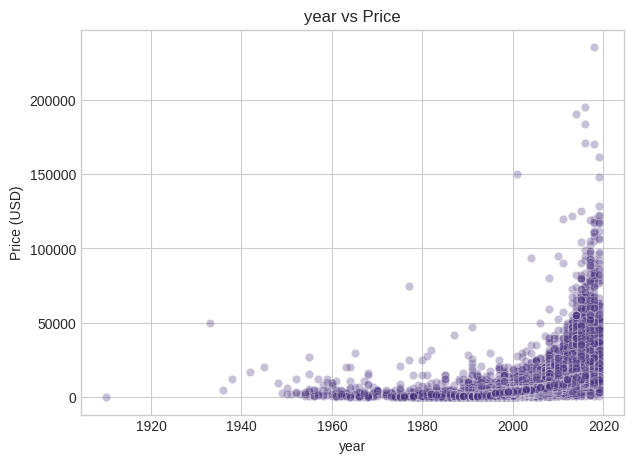

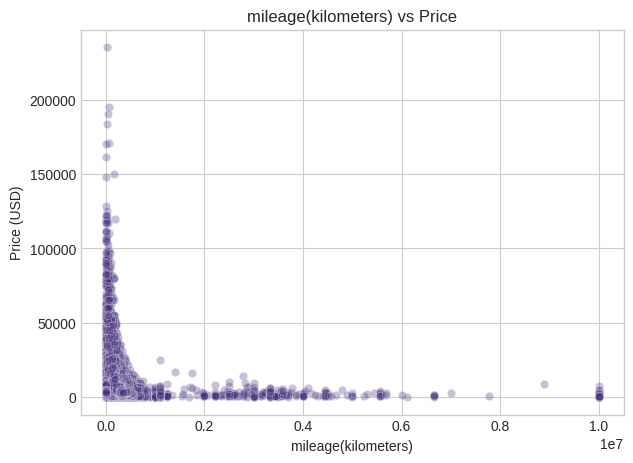

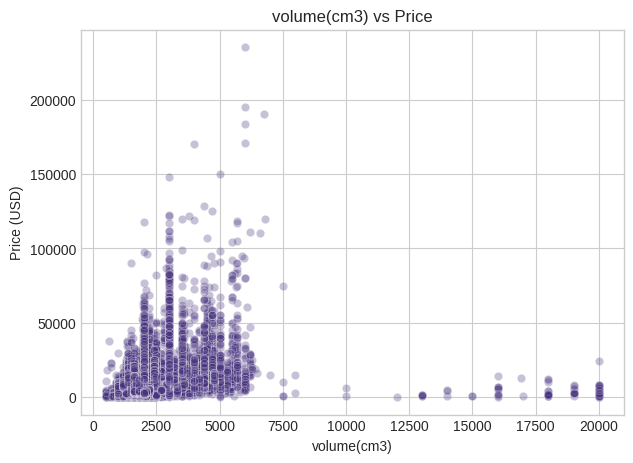

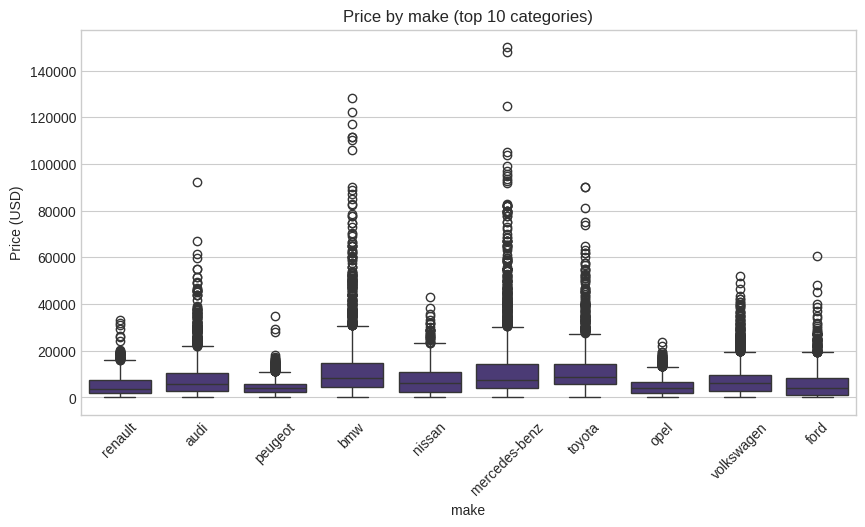

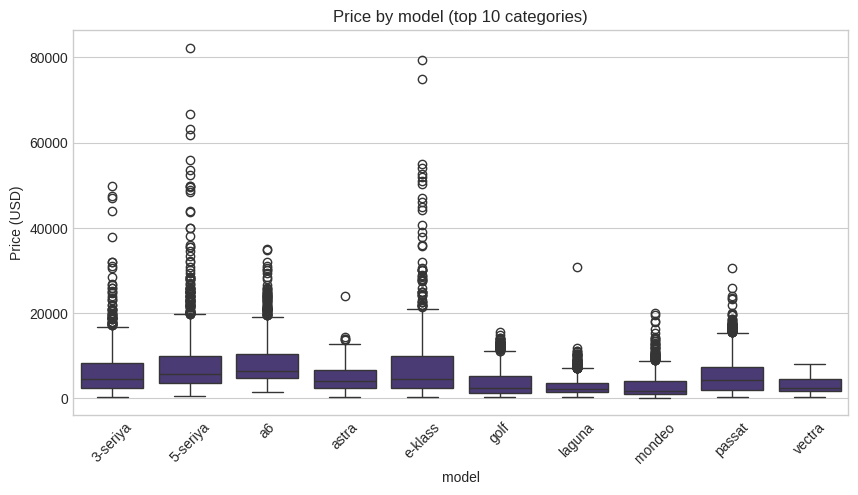

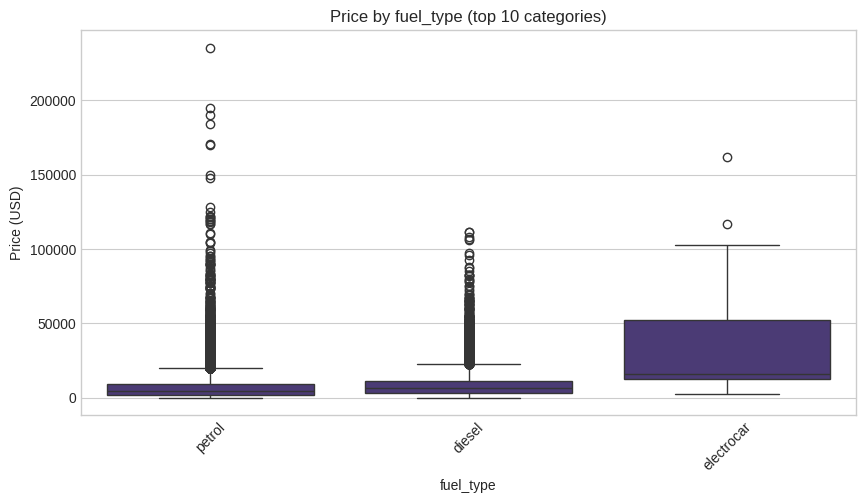

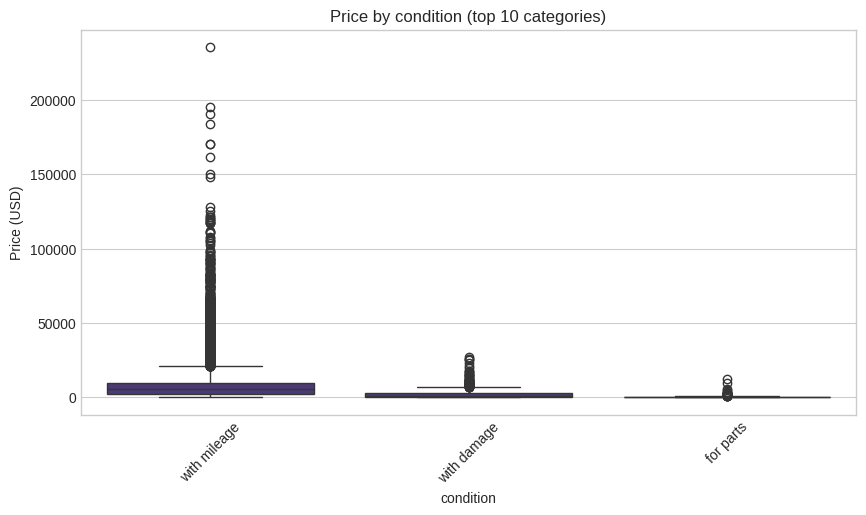

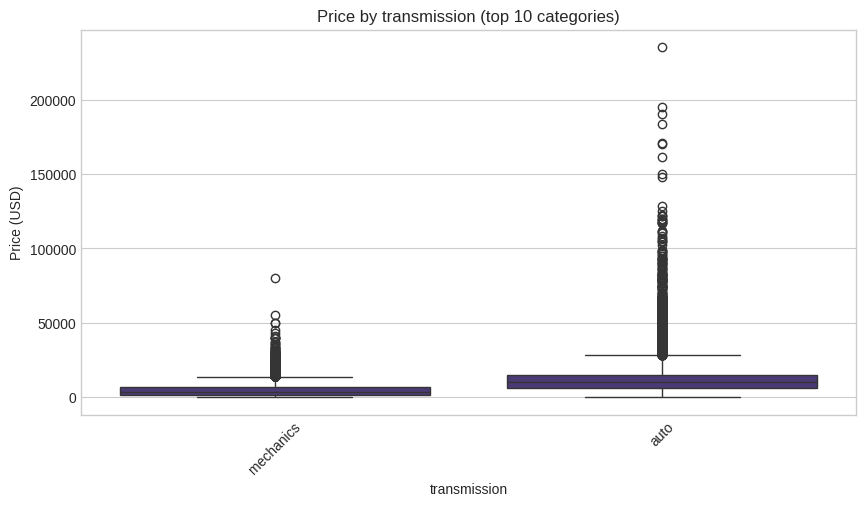

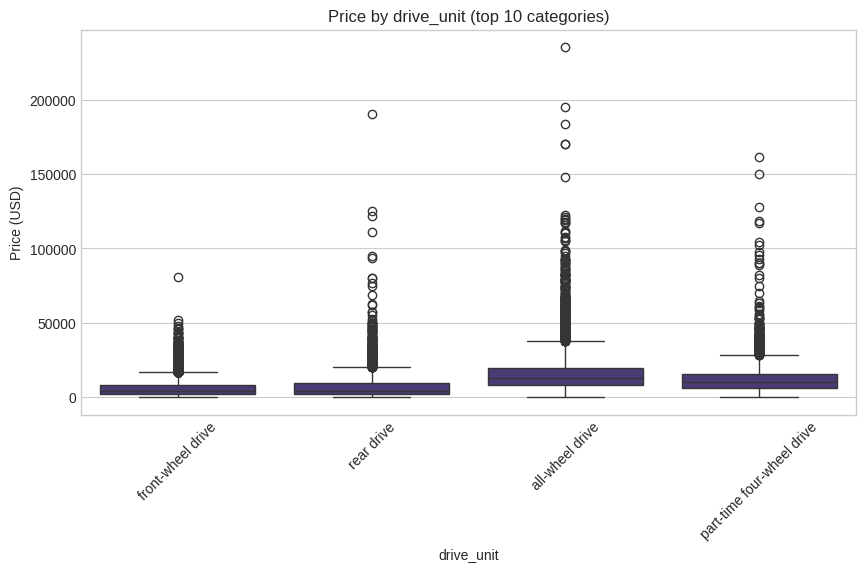

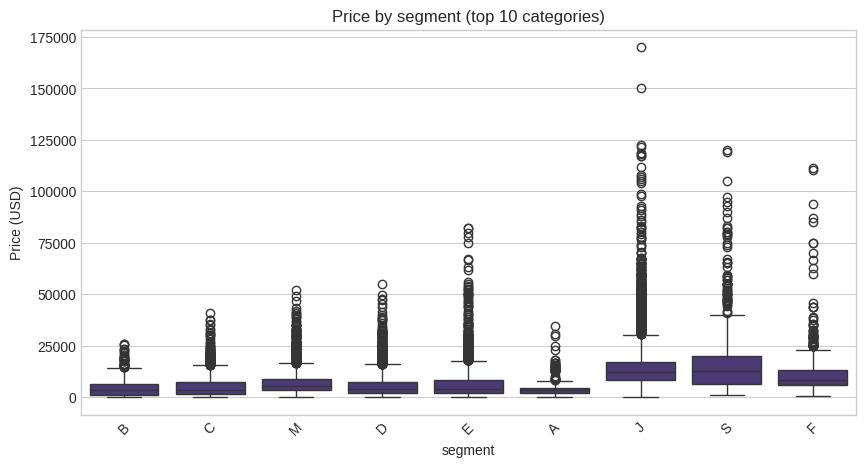

In [7]:
# =========================
# 3. EDA: Target & Features
# =========================

target_col = "priceUSD"
assert target_col in df.columns, "Expected priceUSD column not found."

# --- Target distribution ---
plt.figure(figsize=(8,5))
sns.histplot(df[target_col], bins=50, kde=True)
plt.title("Distribution of Car Prices (USD)")
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x=df[target_col])
plt.title("Boxplot of Car Prices (USD)")
plt.xlabel("Price (USD)")
plt.show()

# --- Year & Mileage relationship with price ---
numeric_cols = ["year", "mileage(kilometers)", "volume(cm3)"]
for col in numeric_cols:
    if col in df.columns:
        plt.figure(figsize=(7,5))
        sns.scatterplot(data=df, x=col, y=target_col, alpha=0.3)
        plt.title(f"{col} vs Price")
        plt.xlabel(col)
        plt.ylabel("Price (USD)")
        plt.show()

# --- Price by key categorical variables ---
cat_cols_for_eda = ["make", "model", "fuel_type", "condition", "transmission", "drive_unit", "segment"]

for col in cat_cols_for_eda:
    if col in df.columns:
        plt.figure(figsize=(10,5))
        top_cats = df[col].value_counts().head(10).index
        sns.boxplot(data=df[df[col].isin(top_cats)], x=col, y=target_col)
        plt.title(f"Price by {col} (top 10 categories)")
        plt.xticks(rotation=45)
        plt.ylabel("Price (USD)")
        plt.show()


### Step 4. Data Cleaning

In [8]:
# =========================
# 4. Data Cleaning
# =========================

# Copy original for safety
data = df.copy()

# Rename mileage and volume to simpler names
data = data.rename(columns={
    "mileage(kilometers)": "mileage_km",
    "volume(cm3)": "engine_volume_cm3"
})

# Check missing values
print("Missing values before cleaning:")
print(data.isna().sum())

# Strategy:
# - Drop rows with missing target
# - Remove clearly invalid or extreme prices if needed
# - Handle missing in predictors: simple imputations
# - Convert year, mileage, volume to numeric if needed

# Remove rows where price is missing or non-positive
data = data[pd.to_numeric(data[target_col], errors="coerce").notna()]
data[target_col] = data[target_col].astype(float)
data = data[data[target_col] > 0]

# Ensure numerical columns are numeric
for col in ["year", "mileage_km", "engine_volume_cm3"]:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors="coerce")

# Inspect again
print("\nMissing values after basic conversions:")
print(data.isna().sum())

# Simple missing handling:
# - For numeric: impute with median
# - For categoricals: impute with "Unknown"

numeric_features_raw = []
categorical_features_raw = []

for col in data.columns:
    if col == target_col:
        continue
    if np.issubdtype(data[col].dtype, np.number):
        numeric_features_raw.append(col)
    else:
        categorical_features_raw.append(col)

print("\nNumeric features:", numeric_features_raw)
print("Categorical features:", categorical_features_raw)


Missing values before cleaning:
make                    0
model                   0
priceUSD                0
year                    0
condition               0
mileage_km              0
fuel_type               0
engine_volume_cm3      47
color                   0
transmission            0
drive_unit           1905
segment              5291
dtype: int64

Missing values after basic conversions:
make                    0
model                   0
priceUSD                0
year                    0
condition               0
mileage_km              0
fuel_type               0
engine_volume_cm3      47
color                   0
transmission            0
drive_unit           1905
segment              5291
dtype: int64

Numeric features: ['year', 'mileage_km', 'engine_volume_cm3']
Categorical features: ['make', 'model', 'condition', 'fuel_type', 'color', 'transmission', 'drive_unit', 'segment']


### Step 5. Feature Engineering

,priceUSD,log_priceUSD
0,5500.0,8.612685
1,5350.0,8.585039
2,7000.0,8.853808
3,3300.0,8.101981
4,5200.0,8.556606


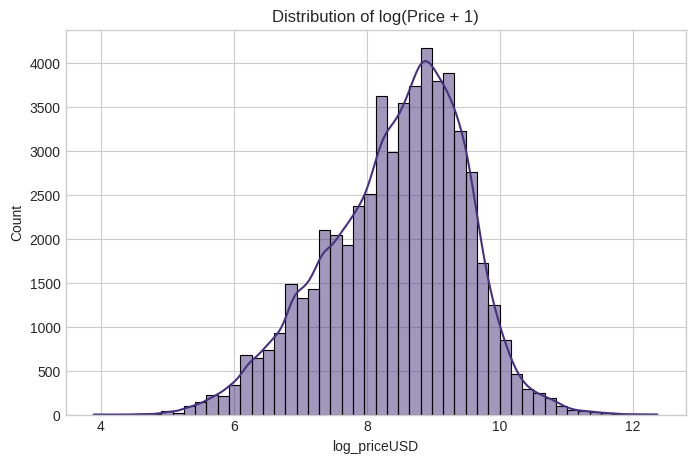


Final numeric features: ['year', 'mileage_km', 'engine_volume_cm3', 'car_age', 'mileage_per_year']
Final categorical features: ['make', 'model', 'condition', 'fuel_type', 'color', 'transmission', 'drive_unit', 'segment']


In [9]:
# =========================
# 5. Feature Engineering
# =========================

# Example engineered features:
# - car_age = current_year (approx 2026) - year
# - mileage_per_year
# - log_price as alternative target (for log-normal like distributions)

CURRENT_YEAR = 2026

if "year" in data.columns:
    data["car_age"] = CURRENT_YEAR - data["year"]
else:
    data["car_age"] = np.nan

if "mileage_km" in data.columns and "year" in data.columns:
    # To avoid division by zero / negative age
    age_safe = data["car_age"].replace(0, np.nan)
    data["mileage_per_year"] = data["mileage_km"] / age_safe
else:
    data["mileage_per_year"] = np.nan

# Replace inf and very large values from mileage_per_year
data["mileage_per_year"].replace([np.inf, -np.inf], np.nan, inplace=True)

# Log transform target for some models (we will keep original target for business interpretation)
data["log_priceUSD"] = np.log1p(data[target_col])

display(data[[target_col, "log_priceUSD"]].head())

plt.figure(figsize=(8,5))
sns.histplot(data["log_priceUSD"], bins=50, kde=True)
plt.title("Distribution of log(Price + 1)")
plt.show()

# Update feature lists after engineering
feature_cols = [col for col in data.columns if col not in [target_col, "log_priceUSD"]]

numeric_features = []
categorical_features = []
for col in feature_cols:
    if np.issubdtype(data[col].dtype, np.number):
        numeric_features.append(col)
    else:
        categorical_features.append(col)

print("\nFinal numeric features:", numeric_features)
print("Final categorical features:", categorical_features)


### Step 6. Train-Test Split

In [10]:
# =========================
# 6. Train-Test Split
# =========================

X = data[feature_cols]
y = data[target_col].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (44995, 13)
Test shape: (11249, 13)


### Step 7. Preprocessing Pipelines

In [11]:
# =========================
# 7. Preprocessing Pipelines
# =========================

from sklearn.impute import SimpleImputer

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)


### Step 8. Baseline Model: Linear Regression


In [12]:
# =========================
# 8. Baseline Model: Linear Regression
# =========================

linreg_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", LinearRegression())
])

linreg_model.fit(X_train, y_train)
y_pred_lr = linreg_model.predict(X_test)

def regression_metrics(y_true, y_pred, model_name="model"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n=== {model_name} ===")
    print(f"MAE : {mae:,.2f}")
    print(f"RMSE: {rmse:,.2f}")
    print(f"R2  : {r2:.4f}")
    return {"model": model_name, "MAE": mae, "RMSE": rmse, "R2": r2}

results = []
results.append(regression_metrics(y_test, y_pred_lr, "LinearRegression"))



=== LinearRegression ===
MAE : 2,088.45
RMSE: 4,416.89
R2  : 0.7025


### Step 9. Tree-based Models

In [13]:
# =========================
# 9. Tree-based Models
# =========================

# ---- Random Forest ----
rf_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", RandomForestRegressor(
        n_estimators=200,
        max_depth=None,
        n_jobs=-1,
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
results.append(regression_metrics(y_test, y_pred_rf, "RandomForestRegressor"))

# ---- Gradient Boosting ----
gb_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=3,
        random_state=42
    ))
])

gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
results.append(regression_metrics(y_test, y_pred_gb, "GradientBoostingRegressor"))

# ---- XGBoost Regressor ----
xgb_model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", XGBRegressor(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        objective="reg:squarederror",
        random_state=42,
        n_jobs=-1
    ))
])

xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
results.append(regression_metrics(y_test, y_pred_xgb, "XGBRegressor"))

# Summarize model comparison
results_df = pd.DataFrame(results)
display(results_df.sort_values("RMSE"))



=== RandomForestRegressor ===
MAE : 1,055.43
RMSE: 2,627.01
R2  : 0.8947

=== GradientBoostingRegressor ===
MAE : 1,488.12
RMSE: 3,030.79
R2  : 0.8599

=== XGBRegressor ===
MAE : 1,277.09
RMSE: 2,739.03
R2  : 0.8856


,model,MAE,RMSE,R2
1,RandomForestRegressor,1055.425720,2627.005140,0.894747
3,XGBRegressor,1277.091171,2739.026104,0.885579
2,GradientBoostingRegressor,1488.122668,3030.787191,0.859904
0,LinearRegression,2088.446785,4416.887461,0.702459


### Step 10. Best Model Validation - Fast

In [17]:
# =========================
# 10. Fast Model Validation
# =========================

print("Best model based on RMSE:", best_model_name)
print("\nTest set performance is already reliable:")
print(results_df.sort_values("RMSE").round(2))

# Quick stability check: fit on 80% of train, validate on remaining 20%
X_train_sub, X_val, y_train_sub, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42  # 20% of train
)

best_model.fit(X_train_sub, y_train_sub)
y_val_pred = best_model.predict(X_val)

print("\nQuick validation on train split:")
regression_metrics(y_val, y_val_pred, f"{best_model_name} (Quick Val)")



Best model based on RMSE: RandomForestRegressor

Test set performance is already reliable:
                       model      MAE     RMSE    R2
1      RandomForestRegressor  1055.43  2627.01  0.89
3               XGBRegressor  1277.09  2739.03  0.89
2  GradientBoostingRegressor  1488.12  3030.79  0.86
0           LinearRegression  2088.45  4416.89  0.70

Quick validation on train split:

=== RandomForestRegressor (Quick Val) ===
MAE : 1,049.03
RMSE: 2,321.87
R2  : 0.9163


{'model': 'RandomForestRegressor (Quick Val)',
 'MAE': 1049.0287051159078,
 'RMSE': np.float64(2321.8708878937),
 'R2': 0.9163265362856989}

### Step 11. Evaluation Plots (Best Model)

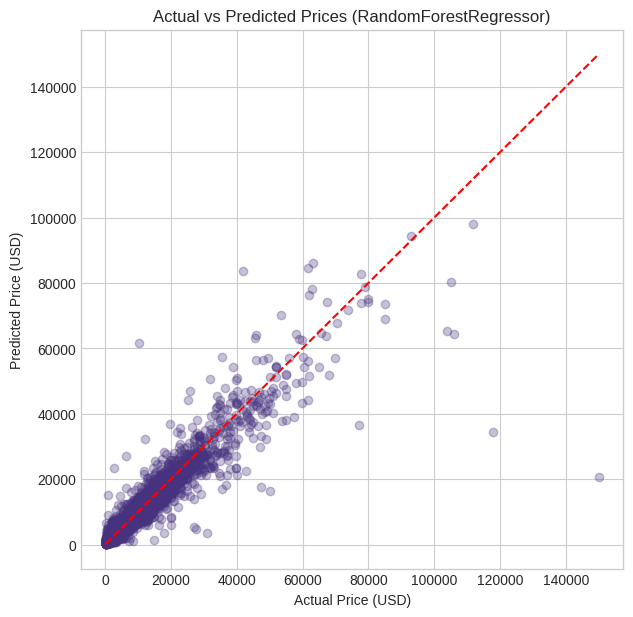

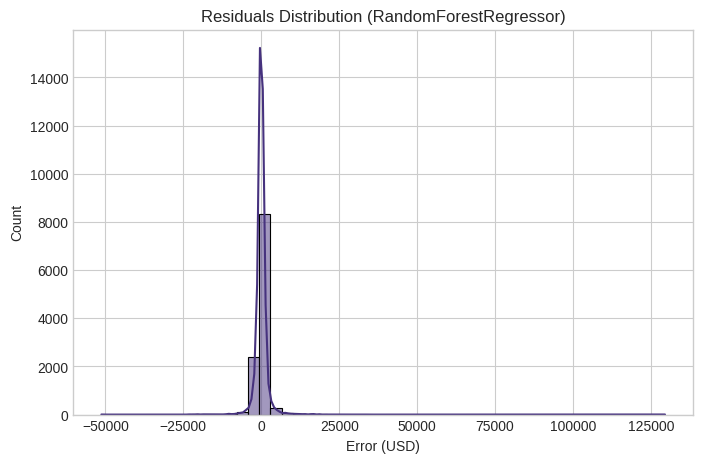

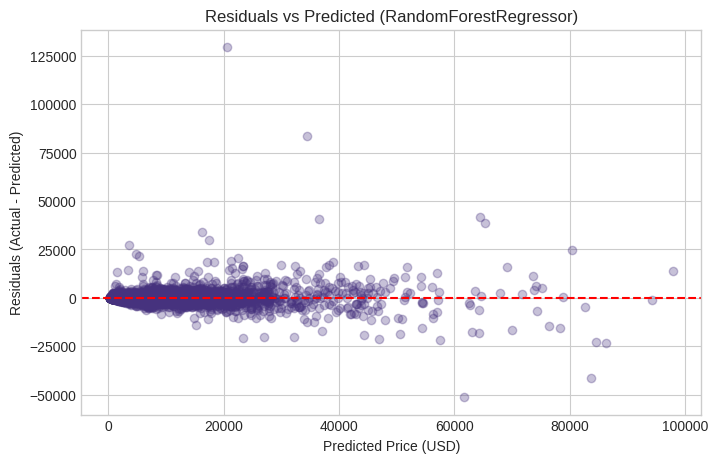

In [18]:
# =========================
# 11. Evaluation Plots (Best Model)
# =========================

# Fit best model on full training data
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

# Scatter: predicted vs actual
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred_best, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.title(f"Actual vs Predicted Prices ({best_model_name})")
plt.show()

# Residuals
residuals = y_test - y_pred_best
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=50, kde=True)
plt.title(f"Residuals Distribution ({best_model_name})")
plt.xlabel("Error (USD)")
plt.show()

plt.figure(figsize=(8,5))
plt.scatter(y_pred_best, residuals, alpha=0.3)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Price (USD)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title(f"Residuals vs Predicted ({best_model_name})")
plt.show()


### Step 12. Feature Importance for Tree-based Models

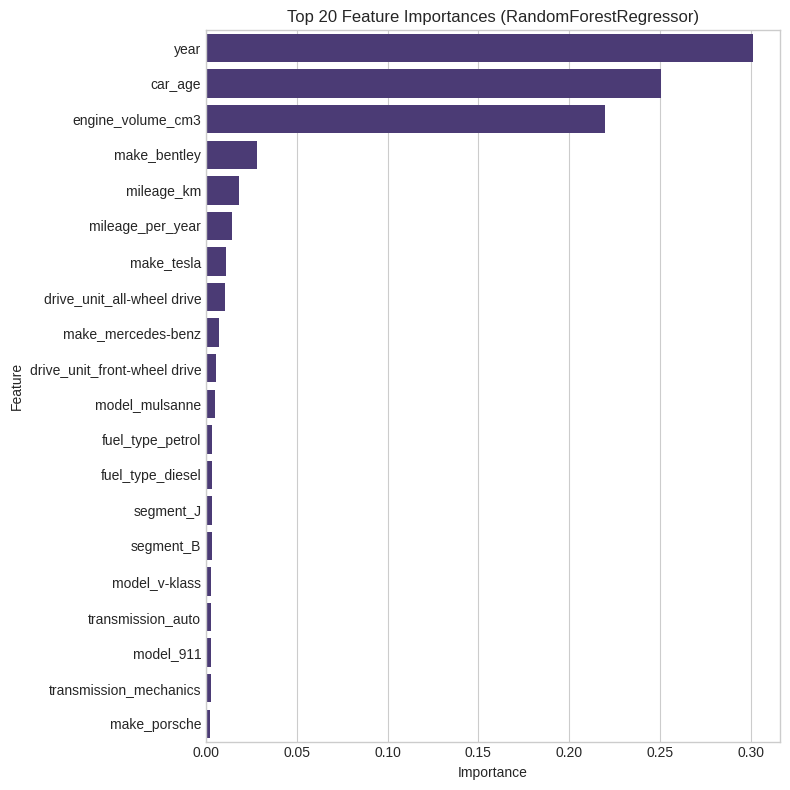

In [19]:
# =========================
# 12. Feature Importance for Tree-based Models
# =========================

def plot_feature_importances(pipeline, model_name, top_n=20):
    """
    Plot feature importances for tree-based model inside a sklearn Pipeline.
    Only works for models that expose feature_importances_.
    """
    model = pipeline.named_steps["model"]
    if not hasattr(model, "feature_importances_"):
        print(f"Model {model_name} has no feature_importances_.")
        return

    # Get feature names after preprocessing
    ohe = pipeline.named_steps["preprocess"].named_transformers_["cat"].named_steps["onehot"]
    cat_cols_out = list(ohe.get_feature_names_out(categorical_features))
    num_cols_out = numeric_features
    all_feature_names = num_cols_out + cat_cols_out

    importances = model.feature_importances_
    fi = pd.DataFrame({
        "feature": all_feature_names,
        "importance": importances
    }).sort_values("importance", ascending=False).head(top_n)

    plt.figure(figsize=(8, max(6, top_n * 0.4)))
    sns.barplot(data=fi, x="importance", y="feature")
    plt.title(f"Top {top_n} Feature Importances ({model_name})")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()

# For tree-based models
if best_model_name in ["RandomForestRegressor", "GradientBoostingRegressor", "XGBRegressor"]:
    plot_feature_importances(best_model, best_model_name, top_n=20)


### Step 13. Example: Predict Price for New Cars

In [20]:
# =========================
# 13. Example: Predict Price for New Cars
# =========================

# Create a small example set
example_cars = pd.DataFrame([
    {
        "make": "mazda",
        "model": "3",
        "year": 2015,
        "condition": "with mileage",
        "mileage_km": 120000,
        "fuel_type": "petrol",
        "engine_volume_cm3": 1600,
        "color": "gray",
        "transmission": "auto",
        "drive_unit": "front-wheel drive",
        "segment": "C"
    },
    {
        "make": "bmw",
        "model": "3",
        "year": 2018,
        "condition": "with mileage",
        "mileage_km": 80000,
        "fuel_type": "diesel",
        "engine_volume_cm3": 2000,
        "color": "black",
        "transmission": "auto",
        "drive_unit": "rear drive",
        "segment": "D"
    }
])

# Apply same feature engineering as training data
example_cars["car_age"] = CURRENT_YEAR - example_cars["year"]
example_cars["mileage_per_year"] = example_cars["mileage_km"] / example_cars["car_age"]

predicted_prices = best_model.predict(example_cars[feature_cols])
example_cars["predicted_priceUSD"] = np.round(predicted_prices, 2)
display(example_cars)


,make,model,year,condition,mileage_km,fuel_type,engine_volume_cm3,color,transmission,drive_unit,segment,car_age,mileage_per_year,predicted_priceUSD
0,mazda,3,2015,with mileage,120000,petrol,1600,gray,auto,front-wheel drive,C,11,10909.090909,12024.2
1,bmw,3,2018,with mileage,80000,diesel,2000,black,auto,rear drive,D,8,10000.000000,37074.5



Summary Report:

- Objective: Build a predictive pricing model to estimate fair market value of used cars based on their characteristics.
- Approach: Conducted EDA, cleaned and engineered features, trained multiple models, compared performance using MAE, RMSE, and R²,
  and selected the best-performing model for deployment.
- Outcome: The final model provides a data-driven, consistent pricing baseline that can reduce underpricing/overpricing,
  support faster sales, and improve overall profitability for the dealership.

                                             PROJECT SUCCESSFULLY COMPLETED! 🐳
